In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

### Step 1: Define the Problem

#### Objective: Predict whether a customer will churn (stop using a service) based on historical data.

In [2]:
# This is a binary classification problem where the target variable 'Churn' is labeled as 1 (churn) or 0 (no churn).
# The goal is to identify key factors contributing to churn and build a model to predict it accurately.

### Step 2: Collect and Prepare Data

In [3]:
# Load the Telco Customer Churn dataset from Kaggle (telco_churn.csv)
# The dataset contains customer information such as tenure, monthly charges, contract type, and churn status
data = pd.read_csv('telco_churn.csv')

# Display the first few rows to understand the dataset structure
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Check data types and missing values to assess data quality
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# Check for missing values in all columns
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
#no missing values, so null handling is not needed

In [7]:
# Drop customerID as it’s a unique identifier and not useful for prediction
data.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric, handling empty strings by converting them to NaN
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce') 

### Step 3: Exploratory Data Analysis (EDA)

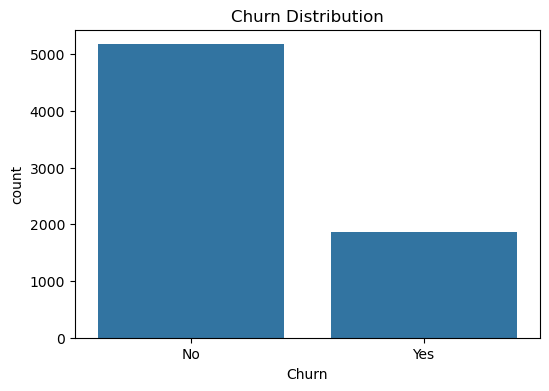

In [8]:

# Objective: Understand data patterns, distributions, and relationships to inform feature engineering and modeling

# Visualize churn distribution to check class balance (churn vs. no churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

In [9]:
# Identify numerical and categorical columns for analysis
column_types=data.dtypes
continuous_cols=column_types[column_types != 'object'].index.tolist()
categorical_cols = column_types[column_types == 'object'].index.tolist()

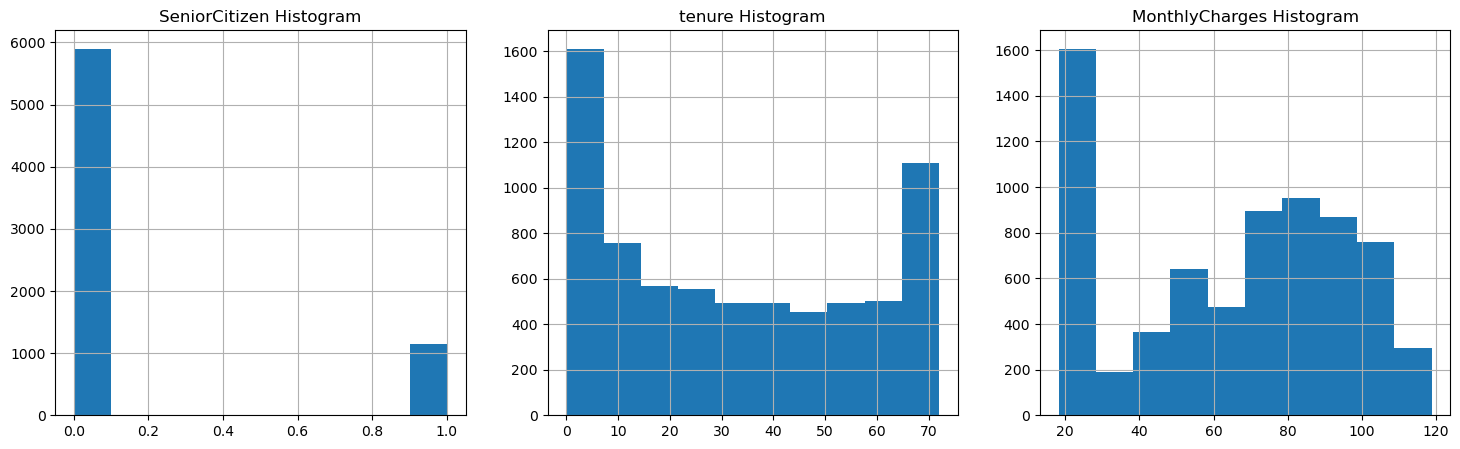

In [10]:
numeric_df = data[continuous_cols]
numeric_corr=numeric_df.corr()

# Visualize histograms of numerical features to understand their distributions
fig, axes = plt.subplots(1,3,figsize=(18, 5))
for i, column in enumerate(continuous_cols[:3]):
    data[column].hist(ax=axes[i])
    axes[i].set_title(f'{column} Histogram')
plt.show()

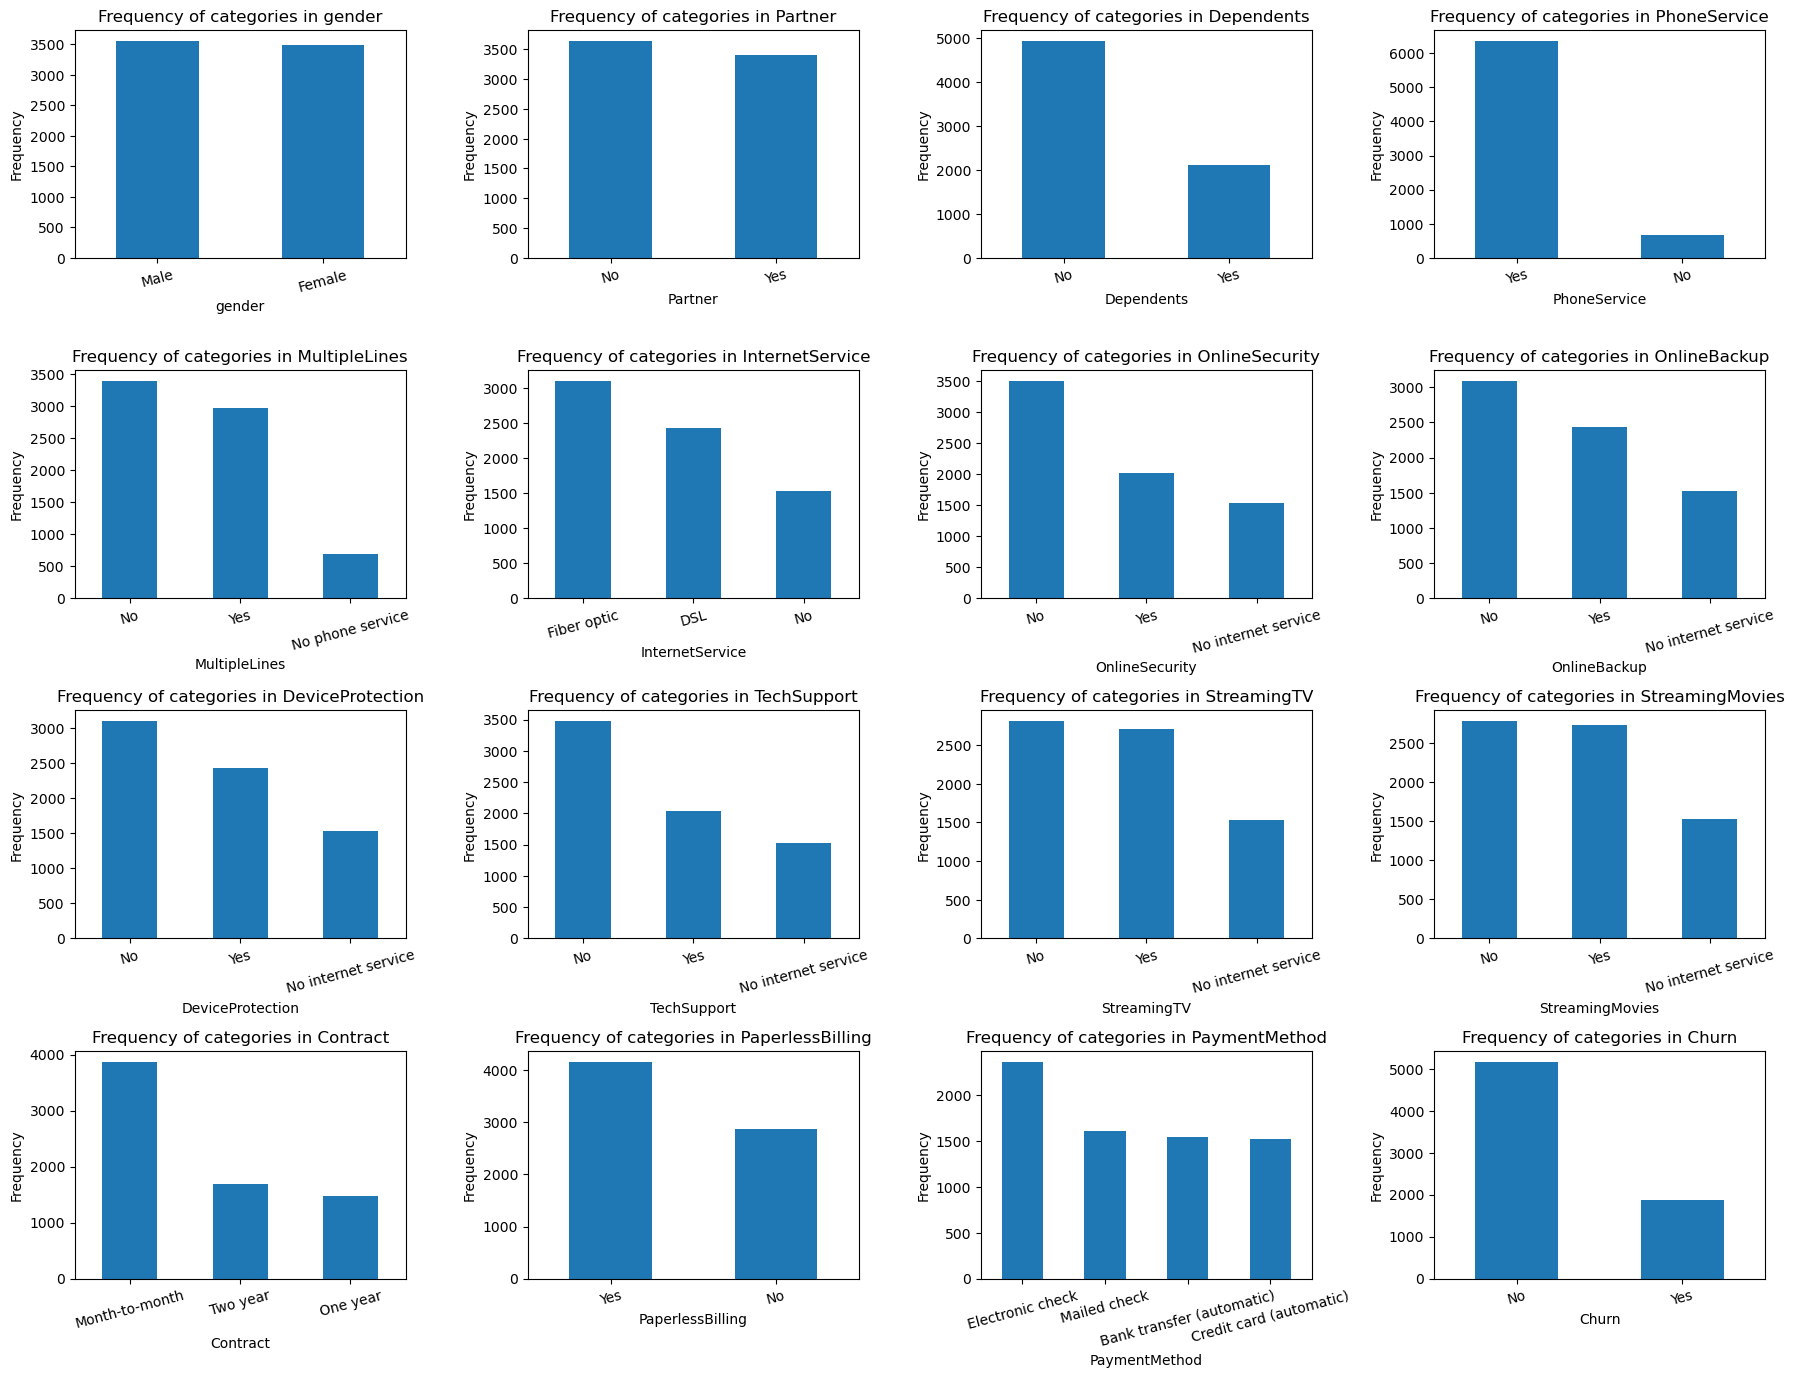

In [11]:
# Visualize frequency of categorical features to understand category distributions
plt.figure(figsize=(18, 30))
for i, column in enumerate(categorical_cols):
    plt.subplot(9, 4, i + 1)
    category_counts = data[column].value_counts()
    category_counts.plot(kind='bar')
    plt.title(f'Frequency of categories in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

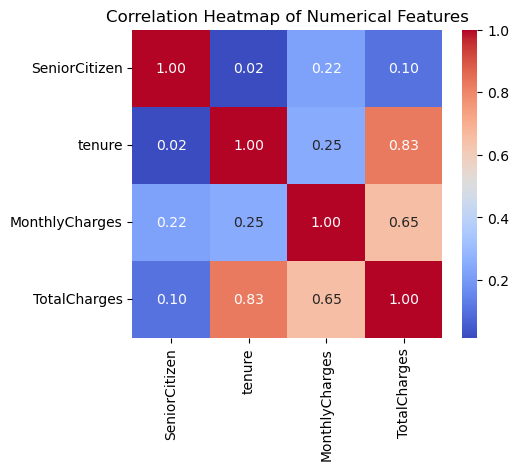

In [12]:
# Visualize correlation heatmap of numerical features to identify relationships
plt.figure(figsize=(5, 4))
sns.heatmap(numeric_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

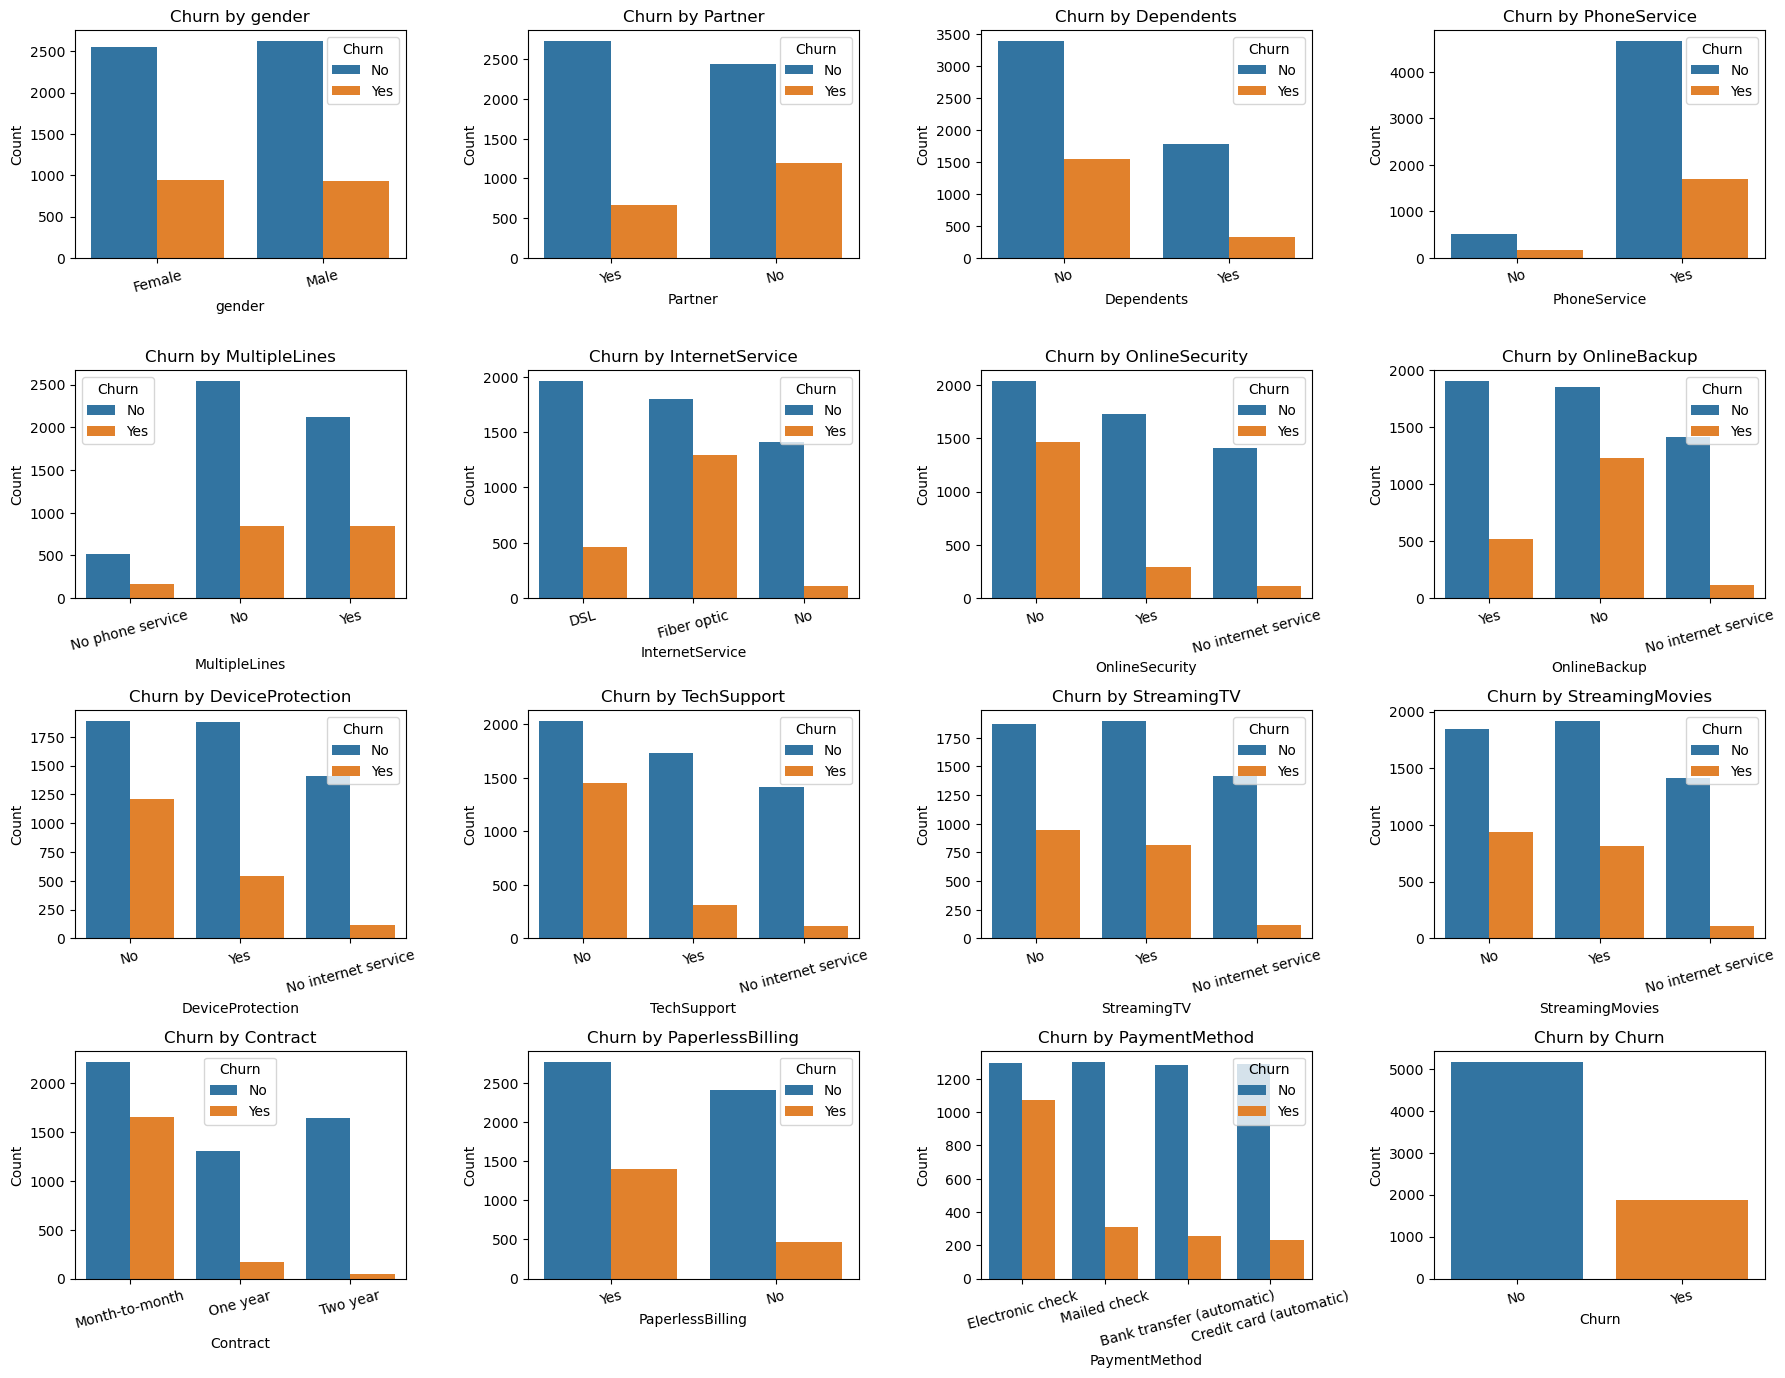

In [13]:
# Visualize churn by categorical features to identify patterns related to churn
plt.figure(figsize=(18, 30))
for i, column in enumerate(categorical_cols):
    plt.subplot(9, 4, i + 1)
    sns.countplot(data=data, x=column, hue='Churn')
    plt.title(f'Churn by {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### Step 4: Feature Engineering

In [14]:

# Objective: Create and transform features to improve model performance

# Encode binary categorical variables to numerical values (0 or 1)
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})
data['gender'] = data['gender'].map({'Male': 1, 'Female': 0})

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# One-hot encode remaining categorical variables to convert them to numerical format
data = pd.get_dummies(data, drop_first=True)


In [15]:
# Create tenure groups to capture patterns in customer tenure
data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
data = pd.get_dummies(data, columns=['tenure_group'], drop_first=True)

### Step 5: Split the Data

In [16]:

# Objective: Divide the dataset into training and testing sets for model training and evaluation

data.columns = data.columns.str.strip() # Remove any leading/trailing spaces in column names
y = data['Churn']
X = data.drop('Churn', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Step 6: Choose a Model & Step 7: Train the Model

In [17]:

# Select Random Forest Classifier due to its robustness for classification tasks and ability to handle imbalanced data
model = RandomForestClassifier(random_state=42)

# Scale numerical features (tenure, MonthlyCharges, TotalCharges) to standardize their ranges
scaler = StandardScaler()
X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

# Train the Random Forest model on the training data
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Step 8: Evaluate the Model

In [18]:

# Predict on the test set and compute evaluation metrics
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-Score: {f1:.2f}')

Accuracy: 0.80
Precision: 0.67
Recall: 0.47
F1-Score: 0.55


### Step 9: Improve the Model

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best F1-Score: 0.57
Accuracy:  {0.8112136266855926}


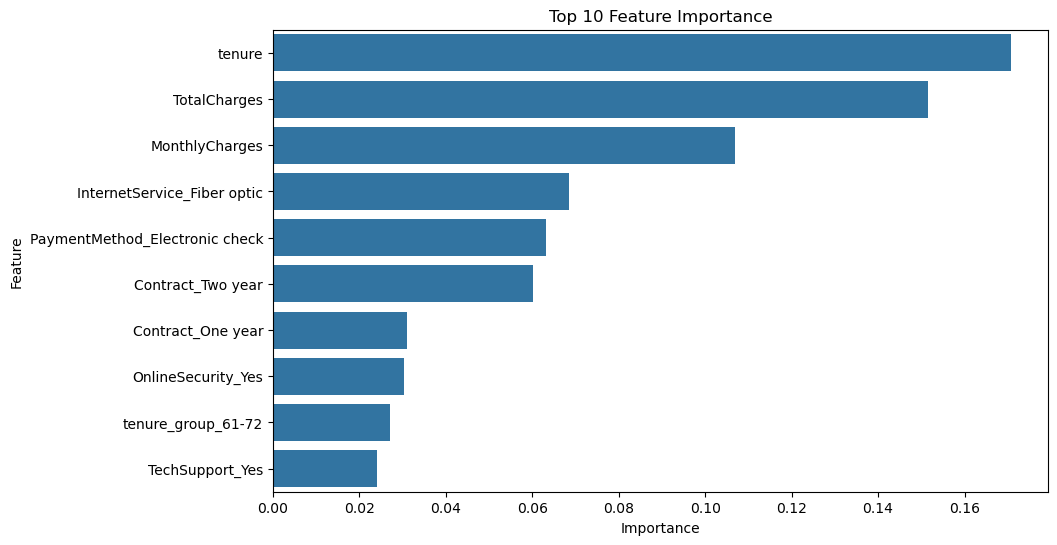

In [19]:

# Perform hyperparameter tuning using GridSearchCV to optimize model performance
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best F1-Score: {grid_search.best_score_:.2f}')

y_pred_tuned = grid_search.best_estimator_.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f'Accuracy: ',{accuracy_tuned})

# Visualize feature importance to identify key predictors of churn
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': grid_search.best_estimator_.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.show()

### Step 10: Deploy the Model (optional)

In [20]:

# The model can be saved for deployment
import joblib
joblib.dump(grid_search.best_estimator_, 'churn_model.pkl')

['churn_model.pkl']